<a href="https://colab.research.google.com/github/HarshaUppuluri777/fml/blob/main/Linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
from plotly.offline import iplot


In [7]:
comp=pd.read_csv("/content/Company_data.csv")

In [8]:
comp.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
comp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
comp.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [11]:
comp.isnull().count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [12]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
comp.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
comp.shape

(200, 4)

In [15]:
comp.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

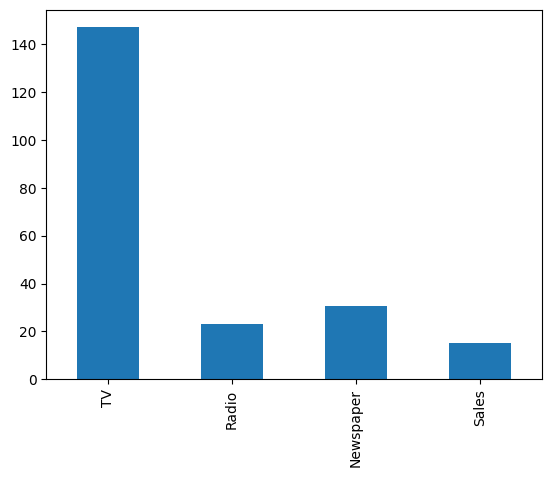

In [16]:
comp.describe().loc['mean'].plot.bar()
plt.show()

<ipython-input-19-feb3b57b4f21>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




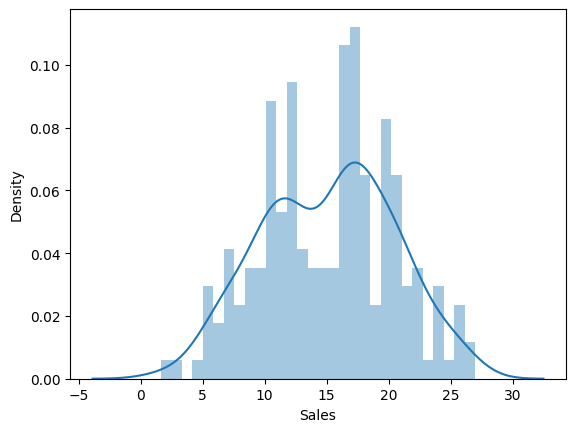

In [19]:
sb.distplot(comp['Sales'],bins=30)
plt.show()

In [20]:
c=comp.corr()
c

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [22]:
c.shape

(4, 4)

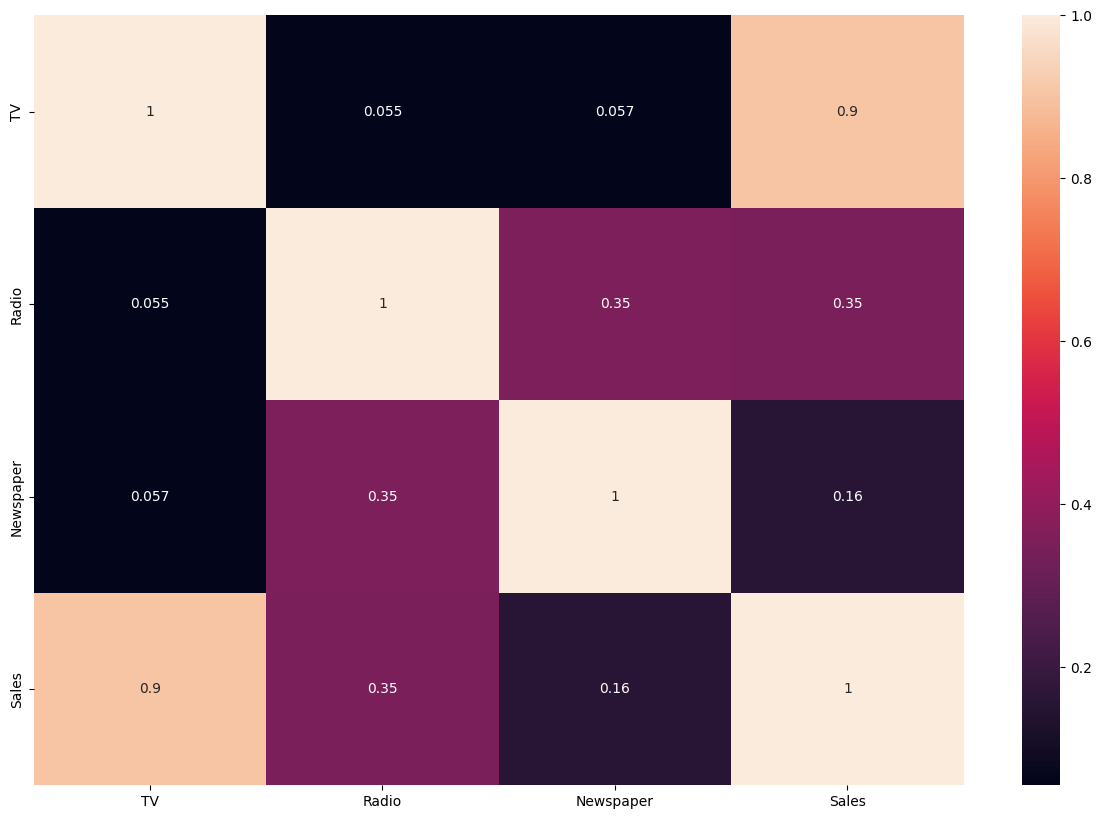

In [24]:
plt.figure(figsize=(15,10))
sb.heatmap(c,annot=True)
plt.show()

In [61]:
from sklearn import linear_model
x=comp.drop('Sales',axis=1).values.reshape(-1,1)
y=comp['Sales'].values

In [62]:
x_tv=x[:,0]

In [59]:
comp.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [31]:
type(x_tv),type(y)

(numpy.ndarray, numpy.ndarray)

In [32]:
x_tv.shape,y.shape

((200,), (200,))

In [64]:
x_tv=x_tv.reshape(-1,1)

In [34]:
y=y.reshape(-1,1)

In [36]:
x_tv.shape,y.shape

((200, 1), (200, 1))

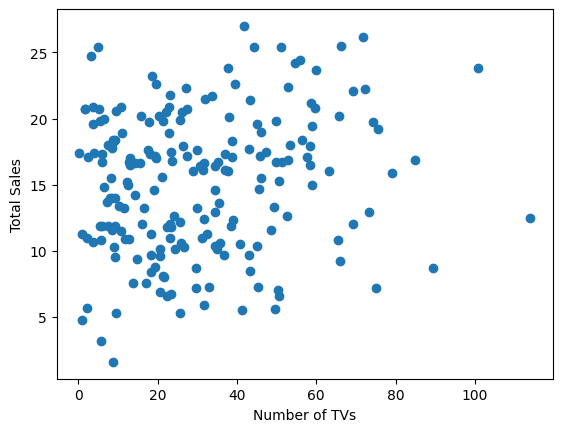

In [37]:
# plotting total sales vs  TV sales
plt.scatter(x_tv,y)
plt.xlabel('Number of TVs')
plt.ylabel('Total Sales')
plt.show()


In [38]:
# Fitting a Regression model
reg=linear_model.LinearRegression()
reg.fit(x_tv,y)

LinearRegression()

In [41]:
#Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred=reg.predict(x_tv)
print(f'MAE={mean_absolute_error(y,y_pred)}')
print(f'MSE={mean_squared_error(y,y_pred)}')
print(f'RMSE={np.sqrt(mean_squared_error(y,y_pred))}')
print(f'R_2={r2_score(y,y_pred)}')

MAE=4.3670510624236485
MSE=27.086772697557045
RMSE=5.204495431601131
R_2=0.024951369862864836


In [42]:
prediction_space=np.linspace(min(x_tv),max(x_tv)).reshape(-1,1)

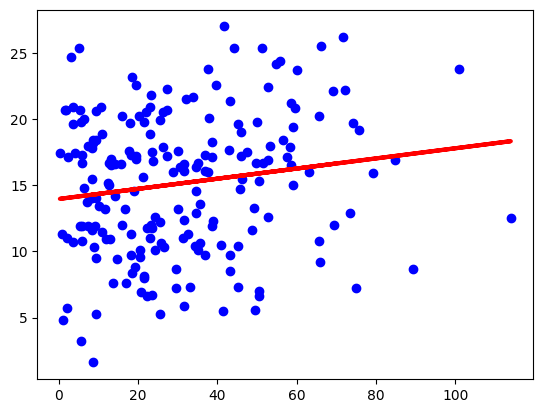

In [43]:
plt.scatter(x_tv,y,color='blue')
plt.plot(x_tv,reg.predict(x_tv),color='red',linewidth=3)
plt.show()

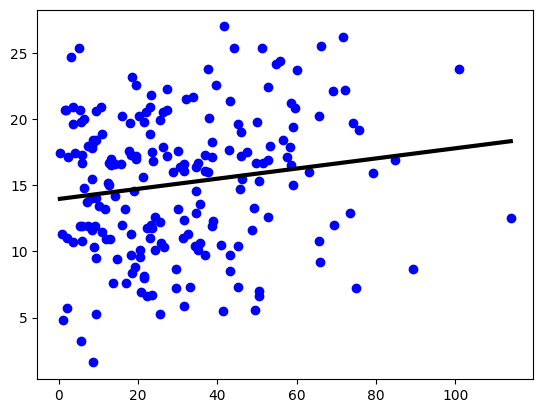

In [44]:
plt.scatter(x_tv,y,color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='black',linewidth=3)
plt.show()